In [41]:
import pandas as pd
import os
import numpy as np

# Classifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

def load_acinetobacter_training_data(datapath):
    df = pd.read_csv(datapath)
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df.reset_index(drop=True, inplace=True)
    df["Mean"] = pd.to_numeric(df["Mean"])
    return df

def binarize_acinetobacter_data(data, cutoff):
    y = [1 if i <= cutoff else 0 for i in data["Mean"]]
    columns = list(data.columns)[:5]
    data = data[columns]
    data["Binary"] = y
    return data

def train_acinetobacter_ml_model(X,y):
    X = np.array(X)
    y = np.array(y)
    model = RandomForestClassifier(n_jobs=-1)
    aurocs = []
    cv_data = []
    for i in range(5):
        print("CV iteration", i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]
        aurocs += [roc_auc_score(y_test, y_pred)]
        cv_data += [(y_test, y_pred)]
    print("Fitting final model")
    model.fit(X, y)
    results = {
        "model": model,
        "aurocs": aurocs,
        "cv_data": cv_data,
        "X": X,
        "y": y
    }
    return results

def predict_acinetobacter_ml_model(X, model):
    y_pred = model.predict_proba(X)[:,1]
    return y_pred



In [43]:
df = load_acinetobacter_training_data("data/eos3804.csv")
eos39co = pd.read_csv("data/eos39co_preds.csv")
eos4u6p = pd.read_csv("data/eos4u6p_preds.csv")
eos4wt0 = pd.read_csv("data/eos4wt0_preds.csv")

In [44]:
df = binarize_acinetobacter_data(df, 0.805)
y = df["Binary"]

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


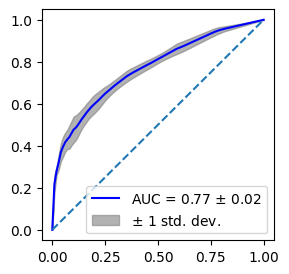

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

X = eos4wt0.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)

aurocs = results["aurocs"]
std_auroc = np.std(aurocs)
tprs = []
mean_fpr = np.linspace(0,1,100)
for i in results["cv_data"]:
    fpr, tpr, _ = metrics.roc_curve(i[0],i[1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aurocs)
fig, ax = plt.subplots(1,1, figsize = (3,3))
ax.plot(
    mean_fpr,
    mean_tpr,
    color = "blue",
    label=r"AUC = %0.2f $\pm$ %0.2f" % (mean_auc, std_auroc),
)
ax.plot([0, 1], [0, 1], ls="--")
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color =  "grey",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    )
ax.legend(loc="lower right")

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


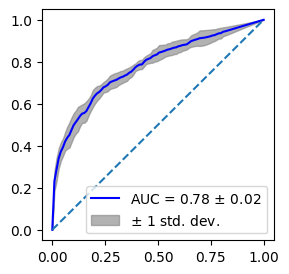

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt

X = eos4u6p.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)

aurocs = results["aurocs"]
std_auroc = np.std(aurocs)
tprs = []
mean_fpr = np.linspace(0,1,100)
for i in results["cv_data"]:
    fpr, tpr, _ = metrics.roc_curve(i[0],i[1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aurocs)
fig, ax = plt.subplots(1,1, figsize = (3,3))
ax.plot(
    mean_fpr,
    mean_tpr,
    color = "blue",
    label=r"AUC = %0.2f $\pm$ %0.2f" % (mean_auc, std_auroc),
)
ax.plot([0, 1], [0, 1], ls="--")
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color =  "grey",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    )
ax.legend(loc="lower right")

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


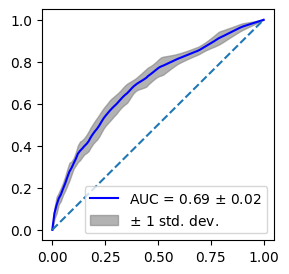

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt

X = eos39co.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)

aurocs = results["aurocs"]
std_auroc = np.std(aurocs)
tprs = []
mean_fpr = np.linspace(0,1,100)
for i in results["cv_data"]:
    fpr, tpr, _ = metrics.roc_curve(i[0],i[1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aurocs)
fig, ax = plt.subplots(1,1, figsize = (3,3))
ax.plot(
    mean_fpr,
    mean_tpr,
    color = "blue",
    label=r"AUC = %0.2f $\pm$ %0.2f" % (mean_auc, std_auroc),
)
ax.plot([0, 1], [0, 1], ls="--")
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color =  "grey",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    )
ax.legend(loc="lower right")

# Regression

In [49]:
df = load_acinetobacter_training_data("data/eos3804.csv")
y = df["Mean"]

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

def train_acinetobacter_ml_model(X, y):
    X = np.array(X)
    y = np.array(y)
    model = RandomForestRegressor(n_jobs=-1,n_estimators=50, max_depth=10, max_features='sqrt')
    r2_scores = []
    maes = []
    rmses = []
    cv_data = []
    for i in range(5):
        print("CV iteration", i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
        maes.append(mean_absolute_error(y_test, y_pred))
        rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        cv_data.append((y_test, y_pred))
    print("Fitting final model")
    model.fit(X, y)
    results = {
        "model": model,
        "r2_scores": r2_scores,
        "maes": maes,
        "rmses": rmses,
        "cv_data": cv_data,
        "X": X,
        "y": y
    }
    return results


import matplotlib.pyplot as plt

def plot_cv_results(cv_data):
    plt.figure(figsize=(5,5))
    for i, (y_test, y_pred) in enumerate(cv_data):
        plt.scatter(y_test, y_pred, alpha=0.6, label=f'Fold {i+1}')
    max_value = max(max(y_test), max(y_pred))
    min_value = min(min(y_test), min(y_pred))
    plt.title('Actual vs Predicted Values (Cross-Validation)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


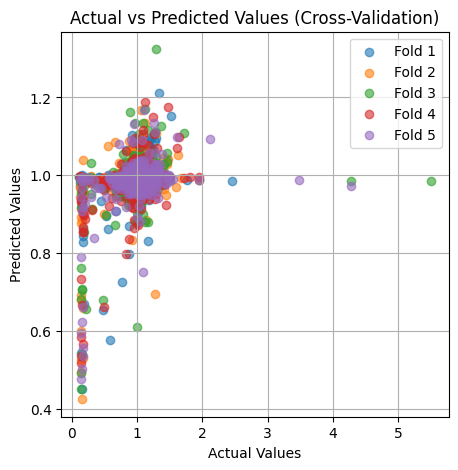

In [51]:
X = eos4wt0.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)
plot_cv_results(results["cv_data"])

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


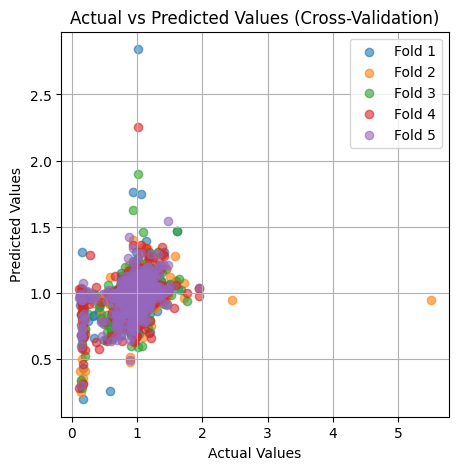

In [38]:
X = eos4u6p.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)
plot_cv_results(results["cv_data"])

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
Fitting final model


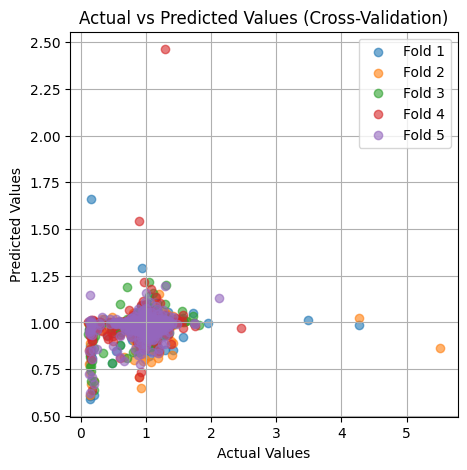

In [40]:
X = eos39co.iloc[:, 2:]
results = train_acinetobacter_ml_model(X,y)
plot_cv_results(results["cv_data"])

In [3]:
# reduce eos4u6p descriptors to test if it works better

import pandas as pd

df= pd.read_csv("data/eos4u6p_preds.csv")
print(df.shape)
df = df.iloc[:, :1000]
print(df.shape)
df.to_csv("data/eos4u6p_preds_red.csv", index=False)

(7684, 3202)
(7684, 1000)
